# Inserting new features into a Risk Education feature layer
----

1. Setup your identifications 
2. Connect to the GIS Portal
3. Read the RE data Excel sheet into a Pandas DataFrame
4. Read the Gazetteer Excel sheet into a Pandas DataFrame
5. Build the geogrid into the RE data DataFrame.
6. Find and read the target RE feature layer
7. Display current information and delete existing features
8. Create the featurelist object that will hold your data.
9. Loop through it, project the coordinate for your loop and then map it to the Excep dataframe.
10. Add data to your feature layer. 

Provided by Sulaiman using the instructions from ArcGIS API for Python https://developers.arcgis.com/python/sample-notebooks/updating-features-in-a-feature-layer/ .

---



In [1]:
# Connect to the GIS Database
from arcgis.gis import GIS
from arcgis import features
from getpass import getpass # to accespt passwrds in an interactive fashion
from IPython import display
import numpy as np
import pandas as pd

### 1. Setting up the configuration
To complete that you will require to identify your default directory for files

In [2]:
portalName = 'https://https://www.arcgis.com/'

# Set your username
portalAdmin = 'Username'

# The location that hold the excel file to be imported 
importDir = './'
# The location of the Gazetteer file.
gazDir = './'
# Excel data that will be importted. 
reportFileName = 'RE Data.xlsx'
# Gazetteer file name must contain Lat/Long fields
gazetteerFile = 'Gazetteer.xlsx'

#### Set your username below

In [4]:
portalAdmin = 'Username'

### 2. Connect to the GIS Portal

In [5]:
# Initating the GIS object to establish  
gis = GIS(portalName, username = portalAdmin)
print("Successfuly logged in as: "+ gis.properties.user.username)

Enter password: ········
Successfuly logged in as: olivierD


In [6]:
user = gis.users.get(portalAdmin)

In [7]:
user

<User username:olivierD>

### 3. Read the Excel sheet into a Pandas DataFrame

In [8]:
#read the received Excel sheet
report_df = pd.read_excel(importDir + reportFileName)
report_df

,organisation,report_date,re_code,governorate,district,subdistrict,community_code,neighbourhood,start_time,end_time,direct_re,male_5_12,female_5_12,male_13_17,female_13_17,male_18_plus,female_18_plus
0,GICHD,2018-01-18,RE_01,Dar'a,Izra',Izra',C6105,Bisr Elharir,09:50:00.000+02,10:30:00.000+02,Yes,0,0,0,0,0,10
1,GICHD,2018-01-18,RE_02,Dar'a,Dar'a,Busra Esh-Sham,C6008,Moraba,10:00:00.000+02,10:33:00.000+02,Yes,3,0,0,5,2,6
2,GICHD,2018-01-18,RE_03,Dar'a,Dar'a,Busra Esh-Sham,C6002,Busra Esh-Sham,11:00:00.000+02,11:30:00.000+02,Yes,0,0,0,0,10,6
3,GICHD,2018-01-16,RE_04,Dar'a,Dar'a,Mseifra,C6044,Mseifra,10:00:00.000+02,10:25:00.000+02,Yes,0,0,0,7,0,8
4,GICHD,2018-01-16,RE_05,Dar'a,Dar'a,Hrak,C6116,Hrak,09:45:00.000+02,10:30:00.000+02,Yes,7,10,0,0,0,2
5,GICHD,2018-01-09,RE_06,Dar'a,Dar'a,Busra Esh-Sham,C6007,Nada,09:10:00.000+02,09:40:00.000+02,Yes,9,7,0,0,1,0
6,GICHD,2018-01-09,RE_07,Dar'a,Dar'a,Hrak,C6116,Hrak,09:35:00.000+02,10:10:00.000+02,Yes,0,0,0,0,0,14
7,GICHD,2018-01-31,RE_08,Aleppo,Jebel Saman,Atareb,C1023,Sahara,12:00:00.000+02,12:35:00.000+02,Yes,0,0,0,13,0,0
8,GICHD,2018-01-31,RE_09,Idleb,Ariha,Ariha,C4285,Maarbalit,10:10:00.000+02,10:50:00.000+02,Yes,12,10,0,0,0,0
9,GICHD,2018-01-31,RE_10,Idleb,Jisr-Ash-Shugur,Janudiyeh,C4263,Foz - Zuf,10:30:00.000+02,11:05:00.000+02,Yes,0,0,23,0,0,0


In [9]:
# get the size of the Mag Report 
report_df.shape

(13, 17)

### 4. Read the Gazetteer sheet into a Pandas DataFrame

In [10]:
# Read the Gazetteer file that is used with the Forms 
gaz_df = pd.read_excel(gazDir+gazetteerFile)
gaz_df.head()

,list_name,p_code,label::en,image,label::ar,ADMIN1_NAME,admin1,admin2_name,admin2,admin3_name,admin3,latitude,longitude
0,comlist,C1001,Damascus,NaN,دمشق,Damascus,SY01,Damascus,SY0100,Damascus,SY010000,33.517175,36.276710
1,comlist,C1002,Yarmuk (Damascus),NaN,اليرموك - دمشق,Damascus,SY01,Damascus,SY0100,Damascus,SY010000,33.471206,36.305668
2,comlist,C6337,Rasm Elfaleh,NaN,رسم الفالح,Aleppo,SY02,Menbij,SY0205,Al-Khafsa,SY020502,36.155368,37.795819
3,comlist,C6688,Juqur Gharbi,NaN,جوقر غربي,Aleppo,SY02,Ain Al Arab,SY0206,Ain al Arab,SY020600,36.886203,38.277094
4,comlist,C6680,Arnaz,NaN,أرناز,Aleppo,SY02,Jebel Saman,SY0200,Atareb,SY020001,36.099697,36.894390


### 5. Build the geogrid into the RE data DataFrame.

In [11]:
# First function to get the latitude.
def find_latitude(row):
    # Retrieve the latitude from Gazetteer. Notice that return value is a Series of float64
    lat = gaz_df[gaz_df["p_code"]==row["community_code"]]["latitude"]
    # Return the values as a float not as a Series.
    return lat.values[0]

def find_longitude(row):
     # Retrieve the Longitude from Gazetteer. Notice that return value is a Series of float64
    lat = gaz_df[gaz_df["p_code"]==row["community_code"]]["longitude"]
    # Return the values as a float not as a Series.
    return lat.values[0]


In [12]:
# create new two columns for Latitude and Longitude
report_df['latitude'] = report_df.apply(find_latitude, axis=1)
report_df['longitude'] = report_df.apply(find_longitude, axis=1)

In [13]:
# Print the head of the new dataFrame and make sure that 
#the Latitude and Longitude columns were add to the dataframe
report_df

,organisation,report_date,re_code,governorate,district,subdistrict,community_code,neighbourhood,start_time,end_time,direct_re,male_5_12,female_5_12,male_13_17,female_13_17,male_18_plus,female_18_plus,latitude,longitude
0,GICHD,2018-01-18,RE_01,Dar'a,Izra',Izra',C6105,Bisr Elharir,09:50:00.000+02,10:30:00.000+02,Yes,0,0,0,0,0,10,32.838868,36.340361
1,GICHD,2018-01-18,RE_02,Dar'a,Dar'a,Busra Esh-Sham,C6008,Moraba,10:00:00.000+02,10:33:00.000+02,Yes,3,0,0,5,2,6,32.545576,36.427859
2,GICHD,2018-01-18,RE_03,Dar'a,Dar'a,Busra Esh-Sham,C6002,Busra Esh-Sham,11:00:00.000+02,11:30:00.000+02,Yes,0,0,0,0,10,6,32.514583,36.477875
3,GICHD,2018-01-16,RE_04,Dar'a,Dar'a,Mseifra,C6044,Mseifra,10:00:00.000+02,10:25:00.000+02,Yes,0,0,0,7,0,8,32.630673,36.339453
4,GICHD,2018-01-16,RE_05,Dar'a,Dar'a,Hrak,C6116,Hrak,09:45:00.000+02,10:30:00.000+02,Yes,7,10,0,0,0,2,32.750677,36.303963
5,GICHD,2018-01-09,RE_06,Dar'a,Dar'a,Busra Esh-Sham,C6007,Nada,09:10:00.000+02,09:40:00.000+02,Yes,9,7,0,0,1,0,32.449262,36.354489
6,GICHD,2018-01-09,RE_07,Dar'a,Dar'a,Hrak,C6116,Hrak,09:35:00.000+02,10:10:00.000+02,Yes,0,0,0,0,0,14,32.750677,36.303963
7,GICHD,2018-01-31,RE_08,Aleppo,Jebel Saman,Atareb,C1023,Sahara,12:00:00.000+02,12:35:00.000+02,Yes,0,0,0,13,0,0,36.183161,36.842719
8,GICHD,2018-01-31,RE_09,Idleb,Ariha,Ariha,C4285,Maarbalit,10:10:00.000+02,10:50:00.000+02,Yes,12,10,0,0,0,0,35.808402,36.660503
9,GICHD,2018-01-31,RE_10,Idleb,Jisr-Ash-Shugur,Janudiyeh,C4263,Foz - Zuf,10:30:00.000+02,11:05:00.000+02,Yes,0,0,23,0,0,0,35.941613,36.234349


### 6. Find and read the target RE feature layer

In [14]:
search_result = gis.content.search(query="id:ac10ba796fb1420f918274430937471d")

In this command we are seaching the content object and the outcome result will be a list `search_result`

- `search_results` a List of Item(s)
    - ---> `re_fcollection` Each Item from `search_results` has a Feature Layer Collection
        - ---> `re_flayer` a Layer from the `re_fcollection`
            - ---> FeatureSet `re_set`


In [15]:
search_result

[<Item title:"RE Form Import (Jupyter Notebook)" type:Feature Layer Collection owner:olivierD>]

In [16]:
re_fcollection = search_result[0]

In [17]:
type(re_fcollection)

arcgis.gis.Item

<Item title:"RE Form Import (Jupyter Notebook)" type:Feature Layer Collection owner:olivierD>
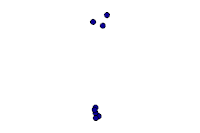

In [18]:
re_fcollection

In [19]:
re_flayer = re_fcollection.layers[0]

In [20]:
type(re_flayer)

arcgis.features.layer.FeatureLayer

In [21]:
re_set = re_flayer.query()

In [22]:
type(re_set)

arcgis.features.feature.FeatureSet

In [23]:
# return all current features (records) 
re_set.df.head()

,community_code,direct_re,district,end_time,female_13_17,female_18_plus,female_5_12,governorate,latitude,longitude,...,male_18_plus,male_5_12,neighbourhood,objectid,organisation,re_code,report_date,start_time,subdistrict,SHAPE
0,C6105,Yes,Izra',10:30:00.000+02,0,10,0,Dar'a,32.838868,36.340361,...,0,0,Bisr Elharir,44,GICHD,RE_01,1516266000000,09:50:00.000+02,Izra',"{'x': 4045390.4444999993, 'y': 3873935.9004999..."
1,C6008,Yes,Dar'a,10:33:00.000+02,5,6,0,Dar'a,32.838868,36.340361,...,2,3,Moraba,45,GICHD,RE_02,1516266000000,10:00:00.000+02,Busra Esh-Sham,"{'x': 4055130.6994000003, 'y': 3835140.9672000..."
2,C6002,Yes,Dar'a,11:30:00.000+02,0,6,0,Dar'a,32.838868,36.340361,...,10,0,Busra Esh-Sham,46,GICHD,RE_03,1516266000000,11:00:00.000+02,Busra Esh-Sham,"{'x': 4060698.4431000017, 'y': 3831048.8078000..."
3,C6044,Yes,Dar'a,10:25:00.000+02,7,8,0,Dar'a,32.838868,36.340361,...,0,0,Mseifra,47,GICHD,RE_04,1516093200000,10:00:00.000+02,Mseifra,"{'x': 4045289.415100001, 'y': 3846383.934799999}"
4,C6116,Yes,Dar'a,10:30:00.000+02,0,2,10,Dar'a,32.838868,36.340361,...,0,7,Hrak,48,GICHD,RE_05,1516093200000,09:45:00.000+02,Hrak,"{'x': 4041338.7294999994, 'y': 3862257.1334000..."


### 7. Display current information and delete existing features

In [24]:
# Show current features on a map
gis = GIS()

map = gis.map("Syria", zoomlevel=6)
map.add_layer(re_flayer)
map

In [25]:
# delete all features
for f in re_set.features:
    objid = f.get_value('objectid')
    re_flayer.edit_features(deletes=str(objid))
    print ("Deleting feature with ojbectid " + str(objid))

Deleting feature with ojbectid 44
Deleting feature with ojbectid 45
Deleting feature with ojbectid 46
Deleting feature with ojbectid 47
Deleting feature with ojbectid 48
Deleting feature with ojbectid 49
Deleting feature with ojbectid 50
Deleting feature with ojbectid 51
Deleting feature with ojbectid 52
Deleting feature with ojbectid 53
Deleting feature with ojbectid 54
Deleting feature with ojbectid 55
Deleting feature with ojbectid 56


In [26]:
map

### 8. Create the featurelist object that will hold your data.

In [27]:
from arcgis import geometry #use geometry module to project Long,Lat to X and Y
from copy import deepcopy
from datetime import datetime

features_to_be_added = []

# get a template feature object
all_features = re_set.features
all_features[0]
template_feature = deepcopy(all_features[0])

### 9. Loop through it, project the coordinate for your loop and then map it to the Excep dataframe.

In [29]:
# loop through each row and add to the list of features to be added
date_format = '%Y-%m-%d'
for row in report_df.iterrows():
    new_feature = deepcopy(template_feature)

    #print
    print("Creating " + row[1]['re_code'])
    
    #get geometries in the destination coordinate system
    input_geometry = {'y':float(row[1]['latitude']),
                       'x':float(row[1]['longitude'])}
    output_geometry = geometry.project(geometries = [input_geometry],
                                       in_sr = 4326, 
                                       out_sr = re_set.spatial_reference['latestWkid'], gis = gis)
    #assign the updated values
    new_feature.geometry = output_geometry[0]
    new_feature.attributes['organisation'] = row[1]['organisation']
    new_feature.attributes['report_date'] = datetime.strptime(row[1]['report_date'], date_format)
    new_feature.attributes['re_code'] = row[1]['re_code']
    new_feature.attributes['governorate'] = row[1]['governorate']
    new_feature.attributes['district'] = row[1]['district']
    new_feature.attributes['subdistrict'] = row[1]['subdistrict']
    new_feature.attributes['community_code'] = row[1]['community_code']
    new_feature.attributes['neighbourhood'] = row[1]['neighbourhood']
    new_feature.attributes['start_time'] = row[1]['start_time']
    new_feature.attributes['end_time'] = row[1]['end_time']
    new_feature.attributes['direct_re'] = row[1]['direct_re']
    new_feature.attributes['male_5_12'] = row[1]['male_5_12']
    new_feature.attributes['female_5_12'] = row[1]['female_5_12']
    new_feature.attributes['male_13_17'] = row[1]['male_13_17']
    new_feature.attributes['female_13_17'] = row[1]['female_13_17']
    new_feature.attributes['male_18_plus'] = row[1]['male_18_plus']
    new_feature.attributes['female_18_plus'] = row[1]['female_18_plus']
    new_feature.attributes['latitude'] = row[1]['latitude']
    new_feature.attributes['longitude'] = row[1]['longitude']
    
    
    features_to_be_added.append(new_feature)

Creating RE_01
Creating RE_02
Creating RE_03
Creating RE_04
Creating RE_05
Creating RE_06
Creating RE_07
Creating RE_08
Creating RE_09
Creating RE_10
Creating RE_11
Creating RE_12
Creating RE_13


In [30]:
features_to_be_added[0]

{"geometry": {"x": 4045390.444471714, "y": 3873935.9004820646}, "attributes": {"objectid": 44, "organisation": "GICHD", "report_date": 1516266000000, "re_code": "RE_01", "governorate": "Dar'a", "district": "Izra'", "subdistrict": "Izra'", "community_code": "C6105", "neighbourhood": "Bisr Elharir", "start_time": "09:50:00.000+02", "end_time": "10:30:00.000+02", "direct_re": "Yes", "male_5_12": 0, "female_5_12": 0, "male_13_17": 0, "female_13_17": 0, "male_18_plus": 0, "female_18_plus": 10, "latitude": 32.838868277000074, "longitude": 36.34036066500005}}

### 10. Add data to your feature layer. 

In [31]:
re_flayer.edit_features(adds = features_to_be_added)

{'addResults': [{'objectId': 57, 'success': True},
  {'objectId': 58, 'success': True},
  {'objectId': 59, 'success': True},
  {'objectId': 60, 'success': True},
  {'objectId': 61, 'success': True},
  {'objectId': 62, 'success': True},
  {'objectId': 63, 'success': True},
  {'objectId': 64, 'success': True},
  {'objectId': 65, 'success': True},
  {'objectId': 66, 'success': True},
  {'objectId': 67, 'success': True},
  {'objectId': 68, 'success': True},
  {'objectId': 69, 'success': True}],
 'attachments': {'addResults': [], 'deleteResults': [], 'updateResults': []},
 'deleteResults': [],
 'updateResults': []}

In [32]:
map